# 딥러닝 프레임워크(Deep Learning Framework)

## 텐서플로우(Tensorflow)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/1200px-TensorFlowLogo.svg.png" width="300">

- 가장 널리 쓰이는 딥러닝 프레임워크 중 하나
- 구글이 주도적으로 개발하는 플랫폼
- 파이썬, C++ API를 기본적으로 제공하고,  
  자바스크립트(JavaScript), 자바(Java), 고(Go), 스위프트(Swift) 등 다양한 프로그래밍 언어를 지원
- tf.keras를 중심으로 고수준 API 통합 (2.x 버전)
- TPU(Tensor Processing Unit) 지원
  - TPU는 GPU보다 전력을 적게 소모, 경제적
  - 일반적으로 32비트(float32)로 수행되는 곱셈 연산을 16비트(float16)로 낮춤

## 케라스(Keras)

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" width="320">

- 파이썬으로 작성된 고수준 신경망 API로 TensorFlow, CNTK, 혹은 Theano와 함께 사용 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- CPU와 GPU에서 매끄럽게 실행

# 딥러닝 데이터 표현과 연산

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장

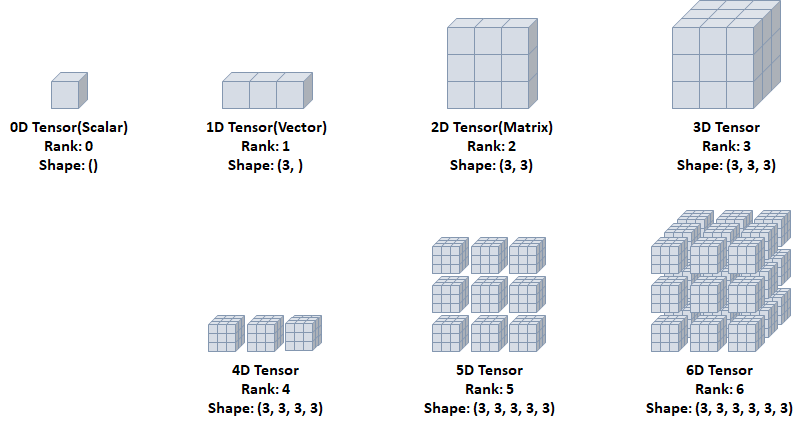

## 텐서(Tensor)

- Rank: 축의 개수
- Shape: 형상(각 축에 따른 차원 개수)
- Type: 데이터 타입

### 0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

### 1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

### 2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

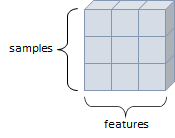

### 3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

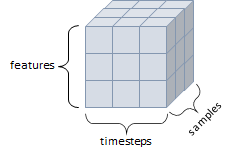

### 4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

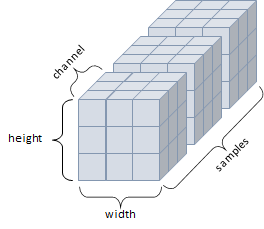

### 5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

## 텐서 데이터 타입

* 텐서의 기본 dtype
  - 정수형 텐서: `int32`
  - 실수형 텐서: `float32`
  - 문자열 텐서: `string`
* `int32`, `float32`,  `string` 타입 외에도 `float16`, `int8` 타입 등이 존재
* 연산시 텐서의 타입 일치 필요
* 타입변환에는 `tf.cast()` 사용

## Lab - Neural network with Zoo problem

In [ ]:
import tensorflow as tf
import numpy as np

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]].flatten()

print(x_data.shape, y_data.shape)

'''
(101, 16) (101, 1)
'''

nb_classes = 7  # 0 ~ 6

# Convert y_data to one_hot
y_one_hot = tf.keras.utils.to_categorical(y_data, nb_classes)
print("one_hot:", y_one_hot)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=16, input_dim=16, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=16, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=16, activation='sigmoid'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax'))

tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(lr=0.2), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_data, y_one_hot, epochs=300, verbose=0)

# Single data test
test_data = np.array([[0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0]]) # expected prediction == 3 (feathers)
print(tf.model.predict(test_data), np.argmax(tf.model.predict(test_data)))

print(tf.model.predict(test_data).sum())

# Alternative code
pred = tf.model.predict(x_data)
pred = np.argmax(pred, axis=1)

for p, y in zip(pred, y_data.flatten()):
    print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))

# Is it real test ?

# print epochs by 500?

# 딥러닝 구조 및 학습

* 딥러닝 구조와 학습에 필요한 요소
  - **모델(네트워크)**를 구성하는 **레이어(layer)**
  - **입력 데이터**와 그에 대한 **목적(결과)**
  - 학습시에 사용할 피드백을 정의하는 **손실 함수(loss function)**
  - 학습 진행 방식을 결정하는 **옵티마이저(optimizer)**

## 레이어(Layer)

* 신경망의 핵심 데이터 구조
* 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈
* 상태가 없는 레이어도 있지만, 대부분 **가중치(weight)**라는 레이어 상태를 가짐
* 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서

* Keras에서 사용되는 주요 레이어
  - Dense
  - Activation
  - Flatten
  - Input

### Dense

* 완전연결계층(Fully-Connected Layer)
* 노드수(유닛수), 활성화 함수(`activation`) 등을 지정
* `name`을 통한 레이어간 구분 가능

* 가중치 초기화(`kernel_initializer`)
  - 신경망의 성능에 큰 영향을 주는 요소  
  - 보통 가중치의 초기값으로 0에 가까운 무작위 값 사용
  - 특정 구조의 신경망을 동일한 학습 데이터로 학습시키더라도, 가중치의 초기값에 따라 학습된 신경망의 성능 차이가 날 수 있음
  - 오차역전파 알고리즘은 기본적으로 경사하강법을 사용하기 때문에 최적해가 아닌 지역해에 빠질 가능성이 있음
  - Keras에서는 기본적으로 Glorot uniform 가중치(Xavier 분포 초기화), zeros bias로 초기화
  - `kernel_initializer` 인자를 통해 다른 가중치 초기화 지정 가능
  - Keras에서 제공하는 가중치 초기화 종류: https://keras.io/api/layers/initializers/

### Activation

- Dense layer에서 미리 활성화 함수를 지정할 수도 있지만 필요에 따라 별도 레이어를 만들어줄 수 있음
- Keras에서 제공하는 활성화 함수(activation function) 종류: https://keras.io/ko/activations/

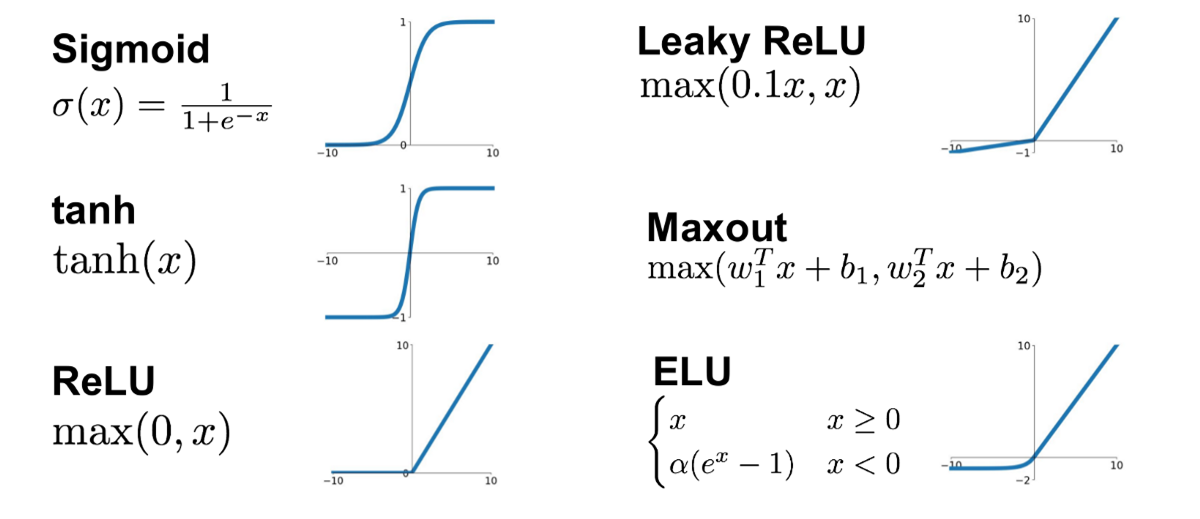

### Flatten

- 배치 크기(또는 데이터 크기)를 제외하고 데이터를 1차원으로 쭉 펼치는 작업
- 예시)
        (128, 3, 2, 2) -> (128, 12)
      

### Input

- 모델의 입력을 정의
- `shape`, `dtype`을 포함
- 하나의 모델은 여러 개의 입력을 가질 수 있음
- `summary()` 메소드를 통해서는 보이지 않음

## 모델(Model)

* 딥러닝 모델은 레이어로 만들어진 비순환 유향 그래프(Directed Acyclic Graph, DAG) 구조

### 모델 구성

  - `Sequential()`
  - 서브클래싱(Subclassing)
  - 함수형 API

#### Sequential()

- 모델이 순차적인 구조로 진행할 때 사용
- 간단한 방법
  - Sequential 객체 생성 후,`add()`를 이용한 방법
  - Sequential 인자에 한번에 추가 방법
- 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없음


#### 서브클래싱(Subclassing)

- 커스터마이징에 최적화된 방법
- Model 클래스를 상속받아 Model이 포함하는 기능을 사용할 수 있음  
  - `fit()`, `evaluate()`, `predict()`
  - `save()`, `load()`
- 주로 `call()` 메소드안에서 원하는 계산 가능
  - for, if, 저수준 연산 등
- 권장되는 방법은 아니지만 어떤 모델의 구현 코드를 참고할 때, 해석할 수 있어야함

### 모델 컴파일(compile)

- 모델을 구성한 후, 사용할 손실 함수(loss function), 옵티마이저(optimizer)를 지정


#### 손실 함수(Loss Function)

* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* Keras에서 주요 손실 함수 제공
  - `sparse_categorical_crossentropy`: 클래스가 배타적 방식으로 구분, 즉 (0, 1, 2, ..., 9)와 같은 방식으로 구분되어 있을 때 사용
  - `categorical_cross_entropy`: 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용
  - `binary_crossentropy`: 이진 분류를 수행할 때 사용

##### 평균절대오차(Mean Absolute Error, MAE)

* 오차가 커져도 손실함수가 일정하게 증가
* 이상치(Outlier)에 강건함(Robust)
  -  데이터에서 [입력 - 정답] 관계가 적절하지 않은 것이 있을 경우에, 좋은 추정을 하더라도 오차가 발생하는 경우가 발생
  - 해당 이상치에 해당하는 지점에서 손실 함수의 최소값으로 가는 정도의 영향력이 크지 않음
* 회귀 (Regression)에 많이 사용
* 평균절대오차 식:
$ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n \left | y_i - \tilde{y}_i \right |$
  - $y_i$ : 학습 데이터의 $i\ $번째 정답
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

![](https://miro.medium.com/max/1152/1*8BQhdKu1nk-tAAbOR17qGg.png)
<br />

##### 평균제곱오차(Mean Squared Error, MSE)

* 가장 많이 쓰이는 손실 함수 중 하나
* 오차가 커질수록 손실함수가 빠르게 증가
  - 정답과 예측한 값의 차이가 클수록 더 많은 페널티를 부여
* 회귀 (Regression)에 쓰임
* 평균제곱오차 식: $ \qquad \qquad E = \frac{1}{n}\sum_{i=1}^n ( y_i - \tilde{y}_i)^2 $
  - $y_i$ : 학습 데이터의 $i\ $번째 정답
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

![](https://miro.medium.com/max/1152/1*EqTaoCB1NmJnsRYEezSACA.png)
<br />


##### 손실함수 MAE와 MSE 비교

![](https://miro.medium.com/max/1400/1*JTC4ReFwSeAt3kvTLq1YoA.png)
<br />

##### 원-핫 인코딩(One-Hot Encoding)

- 범주형 변수를 표현할 때 사용
- 가변수(Dummy Variable)이라고도 함
- 정답인 레이블을 제외하고 0으로 처리

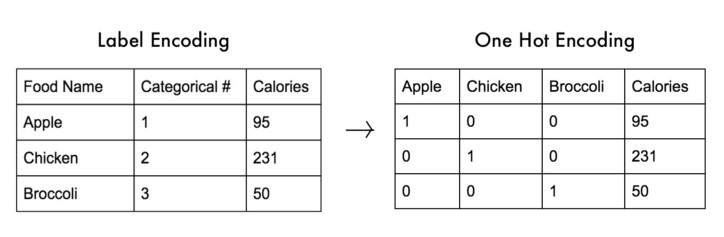

##### 교차 엔트로피 오차(Cross Entropy Error, CEE)

* 이진 분류(Binary Classification), 다중 클래스 분류(Multi Class Classification)
* 소프트맥스(softmax)와 원-핫 인코딩(ont-hot encoding) 사이의 출력 간 거리를 비교
* 정답인 클래스에 대해서만 오차를 계산
* 정답을 맞추면 오차가 0, 틀리면 그 차이가 클수록 오차가 무한히 커짐
* $y = log(x)$
  - $x$가 1에 가까울수록 0에 가까워짐
  - $x$가 0에 가까울수록 $y$값은 무한히 커짐


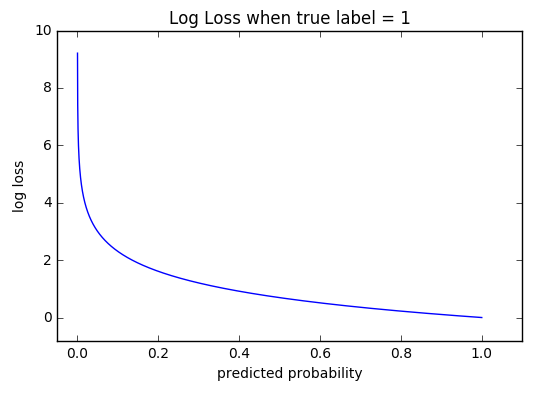

* 교차 엔트로피 오차 식: $ \qquad \qquad E = - \frac{1}{N}\sum_{n} \sum_{i}  y_i\ log\tilde{y}_i  $
  - $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력
  - $N$ : 전체 데이터의 개수
  - $i$ : 데이터 하나당 클래스 개수

* 정답 레이블($y_i$)은 원-핫 인코딩으로 정답인 인덱스에만 1이고, 나머지는 모두 0이라서 다음과 같이 나타낼 수 있음

 $ \qquad \qquad E = - log\tilde{y}_i  $

  - 소프트맥스를 통해 나온 신경망 출력이 0.6이라면 $\ -log0.6 \fallingdotseq -0.51\ $이 되고, 신경망 출력이 0.3이라면  $\ -log0.3 \fallingdotseq -1.2\ $이 됨
  - 정답에 가까워질수록 오차값은 작아짐
  - 학습시, 원-핫 인코딩에 의해 정답 인덱스만 살아 남아 비교하지만, 정답이 아닌 인덱스들도 학습에 영향을 미침. 왜냐하면 다중 클래스 분류는 소프트맥스(softmax) 함수를 통해 전체 항들을 모두 다루기 때문

##### 이진 분류 문제의 교차 크로스 엔트로피(Binary Cross Entropy, BCE)

* 이진 분류 문제(Binary Classification Problem)에서도 크로스 엔트로피 오차를 손실함수로 사용 가능
$ \qquad \qquad E = - \sum_{i=1}^2  y_i\ log\tilde{y}_i \\
\qquad \qquad \ \ \ = -y_1\ log\ \tilde{y}_1 - (1 - y_1)log(1-\ \tilde{y}_1) $  
$\qquad \qquad \qquad ( \because y_2 = 1 - y_1)$
  - $y_i$ : 학습 데이터의 $i\ $번째 정답 (원-핫 인코딩, one-hot encoding)
  - $\tilde{y}_i$ : 학습 데이터의 입력으로 추정한 $i\ $번째 출력

* 2개의 클래스를 분류하는 문제에서 1번이 정답일 확률이 0.8이고, 실제로 정답이 맞다면 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -1\ log\ 0.8 - (1 - 1)\ log\ (1 - 0.8)\\
\qquad \qquad \ \ \ = -log\ 0.8 \\
\qquad \qquad \ \ \ \fallingdotseq -0.22
$

* 반대로, 실제로 정답이 2번이었다면, 식은 다음과 같이 나타낼 수 있음

### $ \qquad \qquad E = -y_1\ log\ \tilde{y}_1 - (1 - y_1)\ log\ (1-\ \tilde{y}_1) \\
\qquad \qquad \ \ \ = -0\ log\ 0.8 - (1 - 0)\ log\ (1 - 0.8)\\
\qquad \qquad \ \ \ = -log\ 0.2 \\
\qquad \qquad \ \ \ \fallingdotseq -1.61
$  



#### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* Keras에서 여러 옵티마이저 제공
  - `keras.optimizer.SGD()`: 기본적인 확률적 경사 하강법
  - `keras.optimizer.Adam()`: 자주 사용되는 옵티마이저
  - Keras에서 사용되는 옵티마이저 종류: https://keras.io/ko/optimizers/
* 보통 옵티마이저의 튜닝을 위해 따로 객체를 생성하여 컴파일    


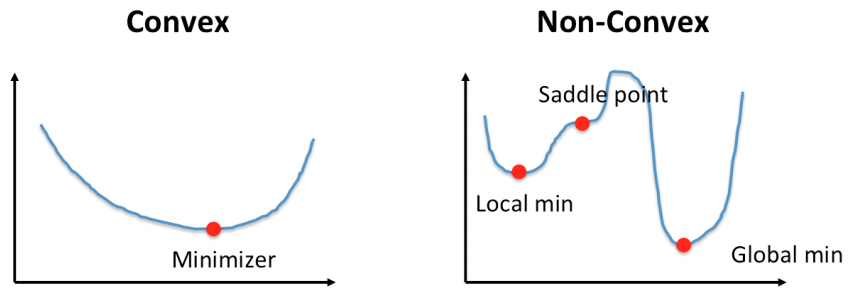

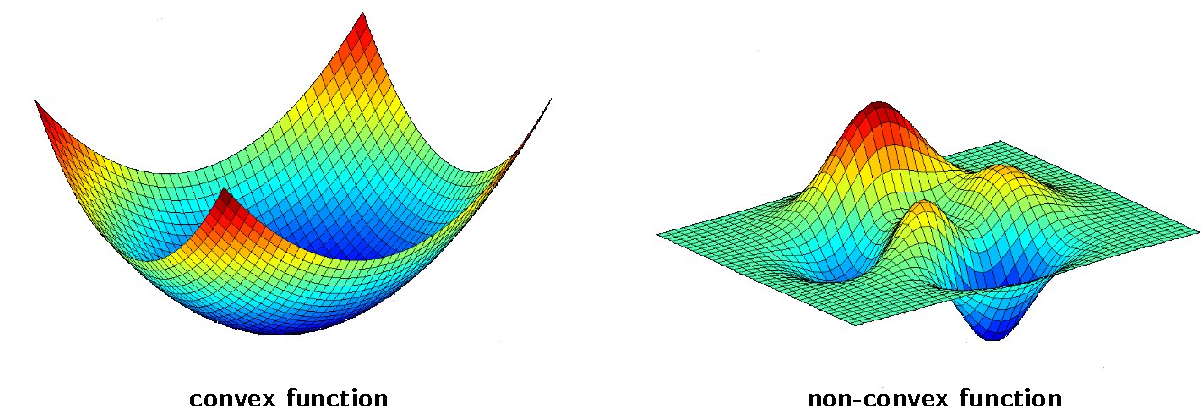

* 볼록함수(Convex Function)
  - 어떤 지점에서 시작하더라도 최적값(손실함수가 최소로하는 점)에 도달할 수 있음
* 비볼록함수(Non-Convex Function)
  - 비볼록 함수는 시작점 위치에 따라 다른 최적값에 도달할 수 있음



##### 경사하강법(Gradient Decent)

* 미분과 기울기
  - 스칼라를 벡터로 미분한 것

## $\quad \frac{df(x)}{dx} = \lim_{\triangle x \to 0} \frac{f(x+\triangle x) - f(x)}{\triangle x}$

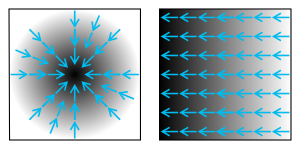

 $\quad \triangledown f(x) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2},\ ... \ , \frac{\partial f}{\partial x_N} \right)$
  - 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점은 미분값이 0
  - 미분값이 클수록 변화량이 크다는 의미


* 경사하강법의 과정
- 경사하강법은 한 스텝마다의 미분값에 따라 이동하는 방향을 결정
- $f(x)$의 값이 변하지 않을 때까지 반복
  
  $\qquad x_n = x_{n-1} - \eta \frac{\partial f}{\partial x}$
    - $\eta$ : 학습률(learning rate)
- 즉, **미분값이 0인 지점**을 찾는 방법  

##### 학습률(learning rate)

- 적절한 학습률을 지정해야 최저점에 잘 도달할 수 있음
- 학습률이 너무 크면 발산하고, 너무 작으면 학습이 오래 걸리거나 최저점에 도달하지 않음

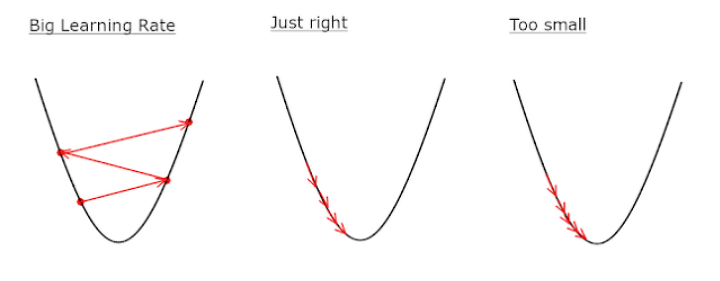

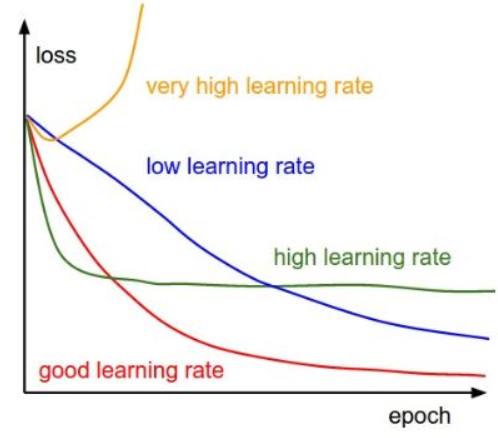

##### 안장점(Saddle Point)

- 기울기가 0이지만 극값이 되지 않음
- 경사하강법은 안장점에서 벗어나지 못함

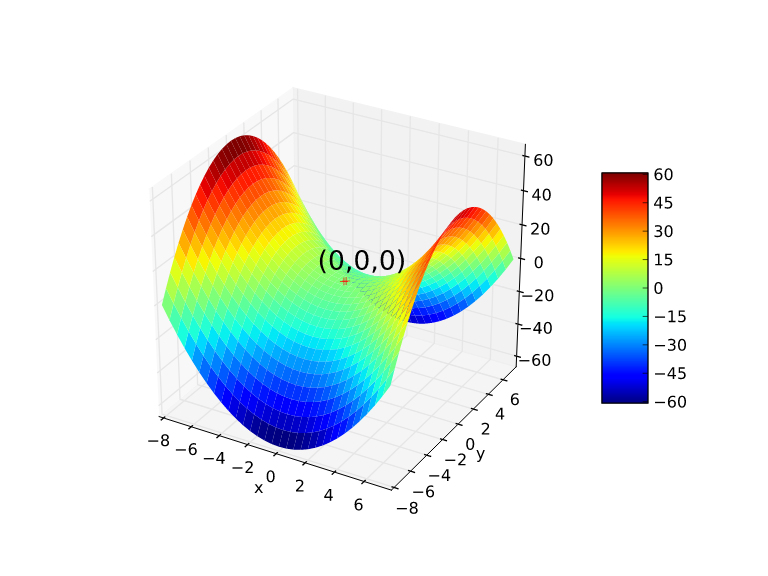

#### 지표(Metrics)

- 모니터링할 지표
- `mae`나 `accuracy` 사용
- 줄여서 `acc`로도 사용 가능
- Keras에서 사용되는 지표 종류: https://keras.io/ko/metrics/

### 모델 학습, 평가 및 예측

- `fit()`
  - `x`: 학습 데이터
  - `y`: 학습 데이터 정답 레이블
  - `epochs`: 학습 회수
  - `batch_size`: 단일 배치에 있는 학습 데이터의 크기
  - `validation_data`: 검증을 위한 데이터
- `evaluate()`
  - 테스트 데이터를 이용한 평가
- `predict()`
  - 임의의 데이터를 사용해 예측

#### 오차역전파 (Backpropagation)

* 오차역전파 알고리즘
  - 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함
  - 각 layer별로 역전파학습을 위해 중간값을 저장
  - 손실함수를 학습 파라미터(가중치, 편향)로 미분하여 마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  - 각 layer를 통과할 때마다 저장된 값을 이용
  - 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신

* 오차역전파 학습의 특징
  - 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에 학습 소요시간이 매우 단축
  - 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용

* 신경망 학습에 있어서 미분가능의 중요성
  - 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값, 즉, 최적값을 찾기 위한 방법으로 미분을 활용
  - 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여 모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)


* 합성함수의 미분 (연쇄법칙, chain rule)

  $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  

  - 여러개를 연속으로 사용 가능

  $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x}
  $

  - 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)

* 오차역전파의 직관적 이해
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음

